In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib_venn import venn2
import seaborn as sns

# check the current working directory
current_working_directory = Path.cwd()
print(current_working_directory)

/Users/elaine/Documents/MRes Project 2/data_for_code/TRAP(retrieval)-specific code


In [25]:
brain_ids = ['JKAY4.2b', 'JKAY11.1g', 'JKAY11.2g', 'JKAY11.6c'] 
region_order = ['dmPAG', 'dlPAG', 'lPAG', 'vlPAG']
slice_order = [f"Slice {global_idx}" for global_idx in range(9)]
fig_output_dir = f"fig_outputs"

## Enrichment ratio (per slice - aligned)

In [17]:
brain_dfs = []
for brain_id in brain_ids:
    input_dir = f"registered/{brain_id}/calculated_outputs"
    global_slices_enrichment_ratios_filename = f"{input_dir}/global_slices_enrichment_ratios.csv"
    global_slices_enrichment_ratios = pd.read_csv(global_slices_enrichment_ratios_filename)
    brain_dfs.append(global_slices_enrichment_ratios)

# Add a 'Brain' column to each and concatenate
for i, df in enumerate(brain_dfs):
    df['Brain'] = brain_ids[i]

combined_enrichment_ratios = pd.concat(brain_dfs, ignore_index=True)
display(combined_enrichment_ratios)

,Region,Global slice index,TRAPed_alsoVgat,TRAPed_alsoVglut,Brain
0,dlPAG,Slice 3,0.000,0.355,JKAY4.2b
1,dlPAG,Slice 4,0.470,1.155,JKAY4.2b
2,dlPAG,Slice 5,0.885,0.915,JKAY4.2b
3,dlPAG,Slice 6,1.010,0.995,JKAY4.2b
4,dlPAG,Slice 7,1.355,0.950,JKAY4.2b
...,...,...,...,...,...
127,vlPAG,Slice 4,0.620,0.800,JKAY11.6c
128,vlPAG,Slice 5,0.680,0.670,JKAY11.6c
129,vlPAG,Slice 6,0.770,0.810,JKAY11.6c
130,vlPAG,Slice 7,0.455,0.470,JKAY11.6c


In [18]:
# Reshape to long format for plotting
group_stats_by_region_df = []
long_df_enrichment_ratio_by_region = [] 
for region in region_order:
    long_df_enrichment_ratio = pd.melt(
        combined_enrichment_ratios[combined_enrichment_ratios['Region'] == region],
        id_vars=['Brain', 'Global slice index'],
        value_vars=['TRAPed_alsoVgat', 'TRAPed_alsoVglut'],
        var_name='Measure',
        value_name='Enrichment Ratio'
    )

    # Optional: cleaner names
    long_df_enrichment_ratio['Measure'] = long_df_enrichment_ratio['Measure'].replace({
        'TRAPed_alsoVgat': "TRAPed_alsoVgat",
        'TRAPed_alsoVglut': "TRAPed_alsoVglut"
    })
    long_df_enrichment_ratio['Global slice index'] = pd.Categorical(long_df_enrichment_ratio['Global slice index'], categories=slice_order, ordered=True)
    long_df_enrichment_ratio_by_region.append(long_df_enrichment_ratio)
    
    group_stats_enrichment_ratio = long_df_enrichment_ratio.groupby(['Global slice index', 'Measure'])['Enrichment Ratio'].agg(
        Mean='mean',
        SEM=lambda x: x.std(ddof=1) / np.sqrt(len(x))
    ).reset_index()
#     display(group_stats_enrichment_ratio)
    
    group_stats_by_region_df.append(group_stats_enrichment_ratio)
    
# Add a 'Region' column to each and concatenate
# Add a 'Region' column to each and concatenate
for i, df in enumerate(long_df_enrichment_ratio_by_region):
    df['Region'] = region_order[i]
combined_long_df_enrichment_ratio = pd.concat(long_df_enrichment_ratio_by_region, ignore_index=True)
display(combined_long_df_enrichment_ratio)
for i, df in enumerate(group_stats_by_region_df):
    df['Region'] = region_order[i]
combined_group_stats_enrichment_ratio = pd.concat(group_stats_by_region_df, ignore_index=True)
display(combined_group_stats_enrichment_ratio)

/var/folders/c7/5771wv6s2813rknrq0_l2xwm0000gn/T/ipykernel_20029/2338647208.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats_enrichment_ratio = long_df_enrichment_ratio.groupby(['Global slice index', 'Measure'])['Enrichment Ratio'].agg(
/var/folders/c7/5771wv6s2813rknrq0_l2xwm0000gn/T/ipykernel_20029/2338647208.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats_enrichment_ratio = long_df_enrichment_ratio.groupby(['Global slice index', 'Measure'])['Enrichment Ratio'].agg(
/var/folders/c7/5771wv6s2813rknrq0_l2xwm0000gn/T/ipykernel_20029/2338647208.py:21: FutureWarning: The default 

,Brain,Global slice index,Measure,Enrichment Ratio,Region
0,JKAY4.2b,Slice 3,TRAPed_alsoVgat,0.000,dmPAG
1,JKAY4.2b,Slice 4,TRAPed_alsoVgat,0.000,dmPAG
2,JKAY4.2b,Slice 5,TRAPed_alsoVgat,0.605,dmPAG
3,JKAY4.2b,Slice 6,TRAPed_alsoVgat,0.770,dmPAG
4,JKAY4.2b,Slice 7,TRAPed_alsoVgat,1.260,dmPAG
...,...,...,...,...,...
259,JKAY11.6c,Slice 4,TRAPed_alsoVglut,0.800,vlPAG
260,JKAY11.6c,Slice 5,TRAPed_alsoVglut,0.670,vlPAG
261,JKAY11.6c,Slice 6,TRAPed_alsoVglut,0.810,vlPAG
262,JKAY11.6c,Slice 7,TRAPed_alsoVglut,0.470,vlPAG


,Global slice index,Measure,Mean,SEM,Region
0,Slice 0,TRAPed_alsoVgat,0.501667,0.065596,dmPAG
1,Slice 0,TRAPed_alsoVglut,0.931667,0.140545,dmPAG
2,Slice 1,TRAPed_alsoVgat,0.650000,0.121244,dmPAG
3,Slice 1,TRAPed_alsoVglut,0.923333,0.040961,dmPAG
4,Slice 2,TRAPed_alsoVgat,0.571667,0.200215,dmPAG
...,...,...,...,...,...
67,Slice 6,TRAPed_alsoVglut,0.803750,0.202128,vlPAG
68,Slice 7,TRAPed_alsoVgat,0.638750,0.090930,vlPAG
69,Slice 7,TRAPed_alsoVglut,0.760000,0.191529,vlPAG
70,Slice 8,TRAPed_alsoVgat,0.700000,0.087082,vlPAG


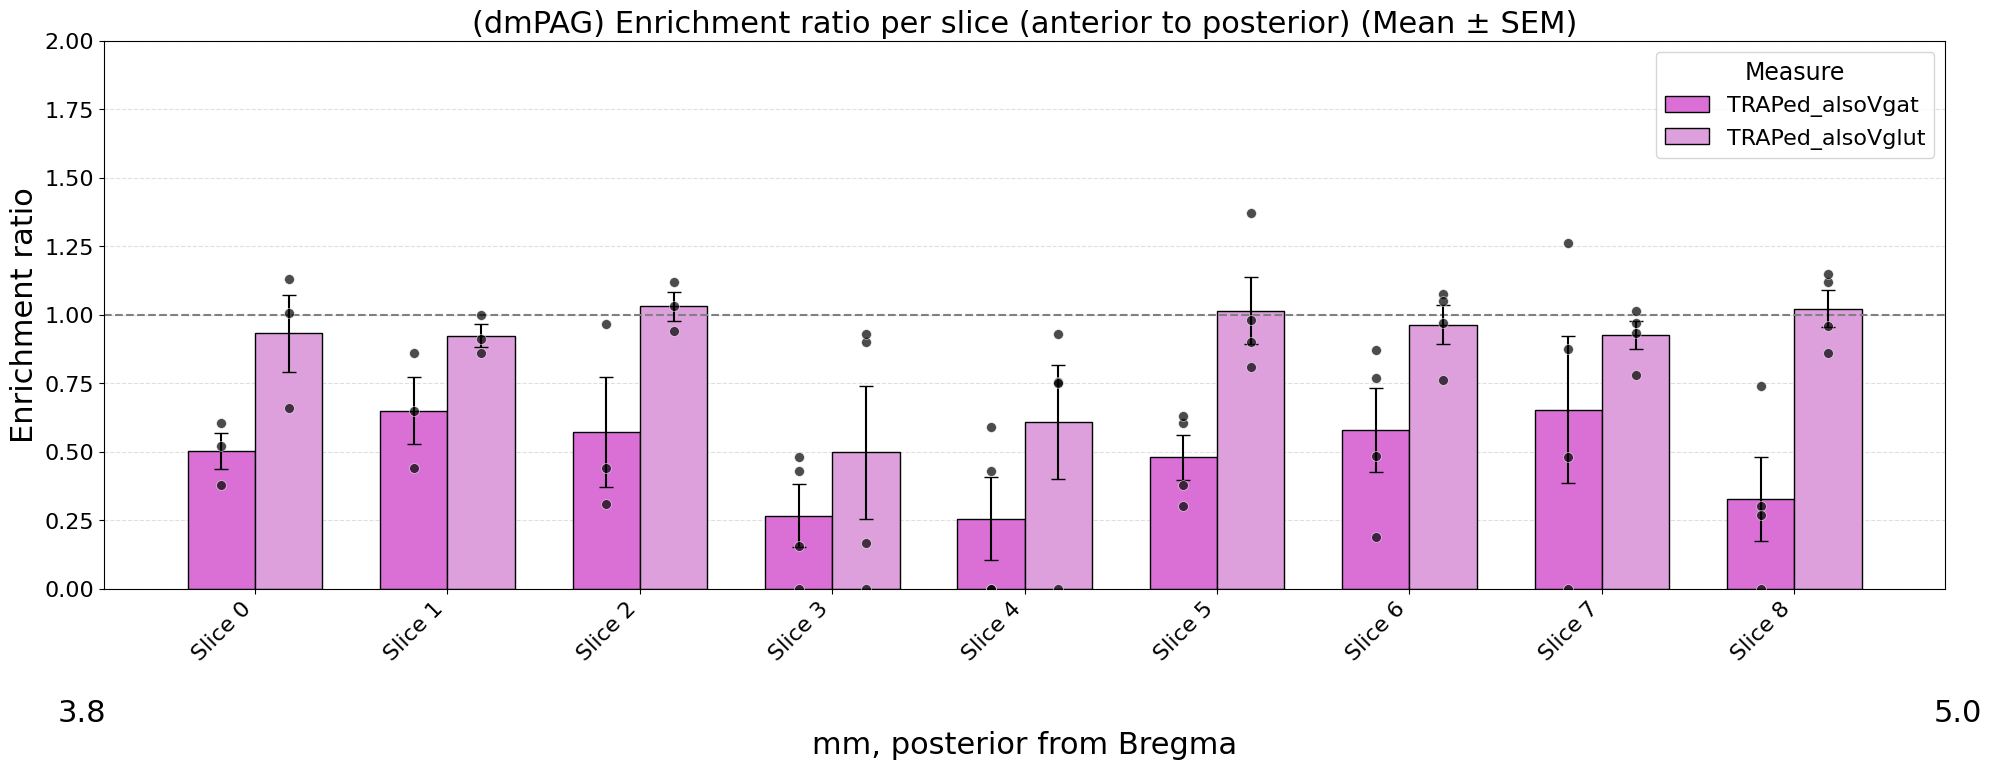

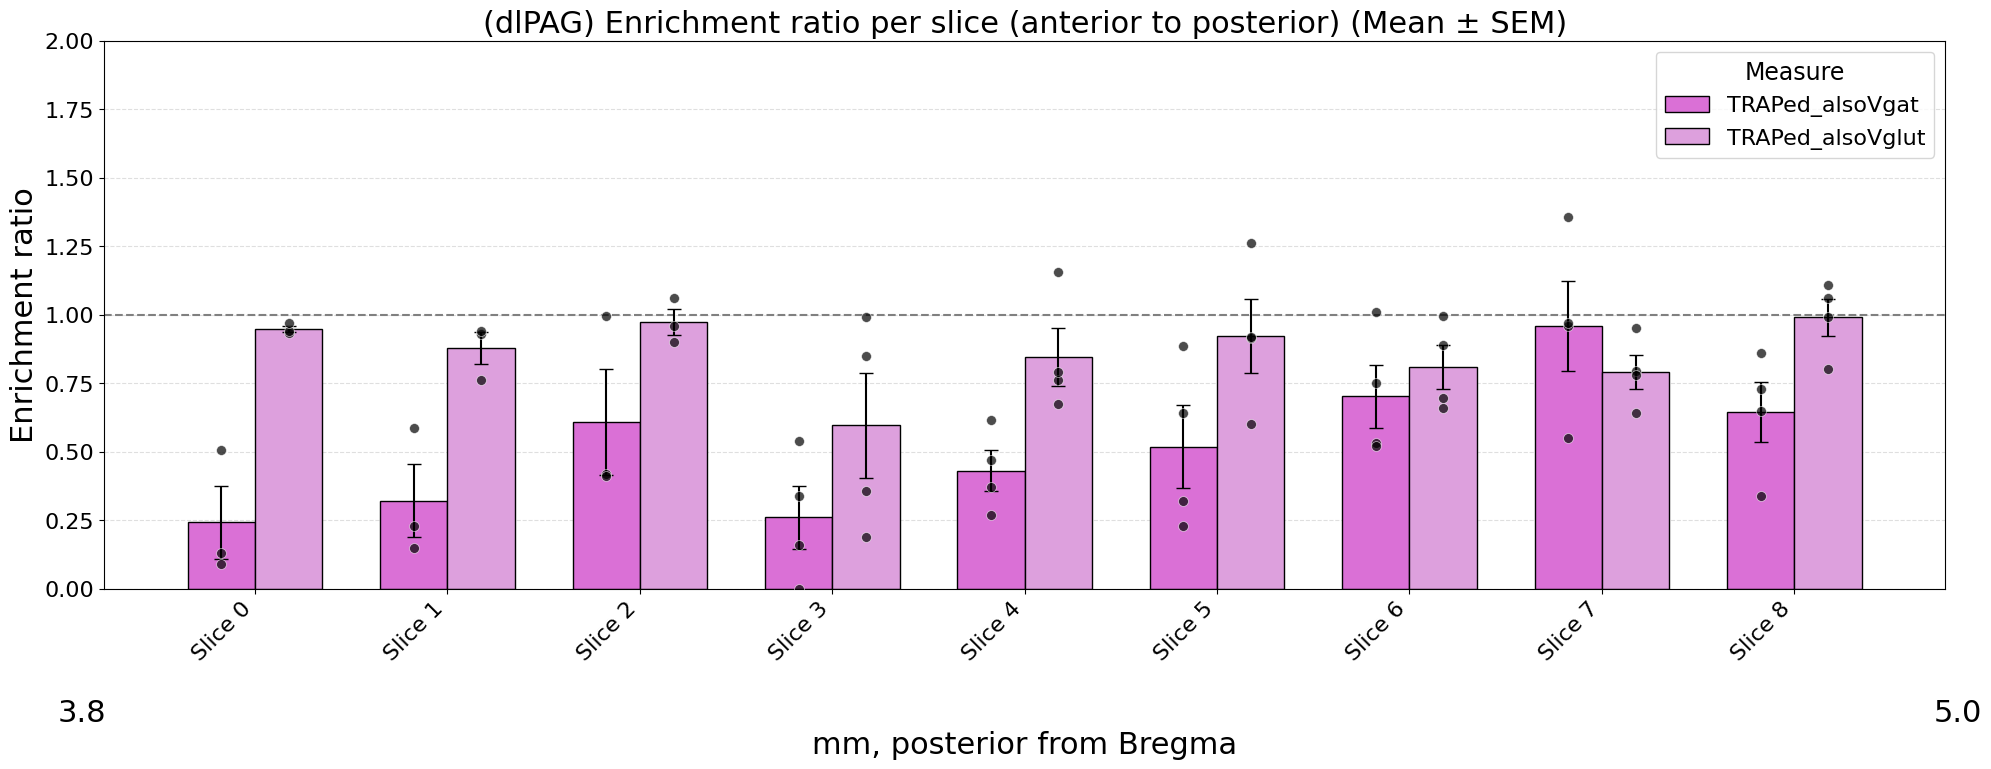

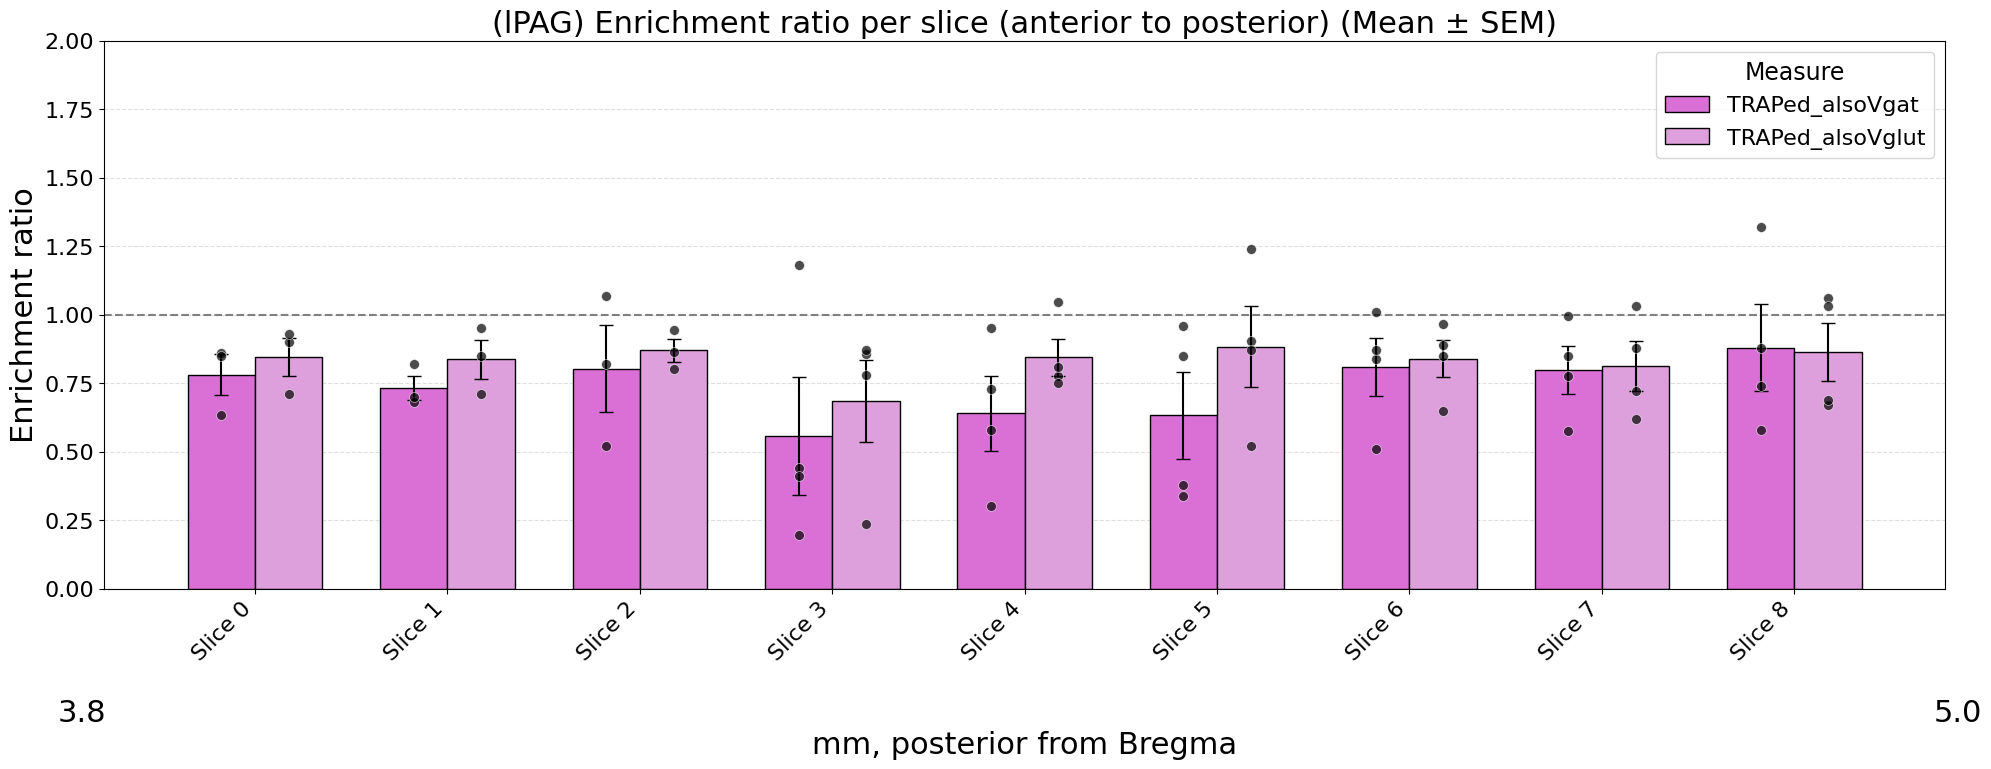

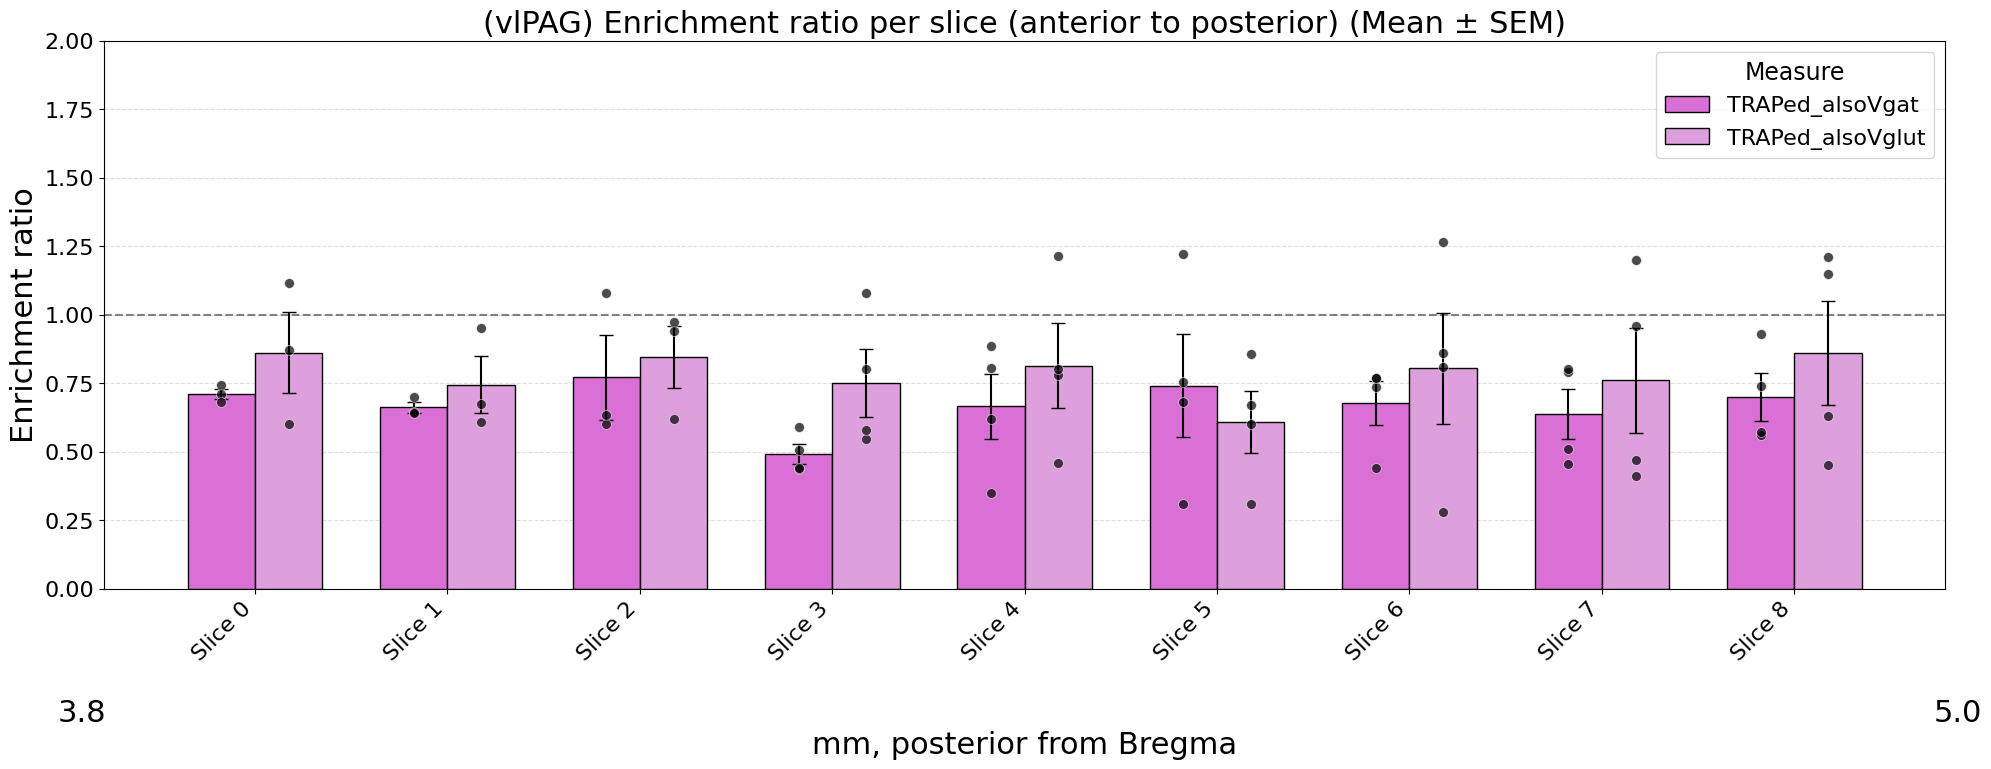

In [19]:
# Set up plot style
palette = {
    "TRAPed_alsoVgat": 'orchid',
    "TRAPed_alsoVglut": 'plum'
}
measures = ["TRAPed_alsoVgat", "TRAPed_alsoVglut"]

for region in region_order:
    # Create one big plot per region
    fig, ax = plt.subplots(figsize=(20, 8))
    group_stats_df_enrichment = combined_group_stats_enrichment_ratio[combined_group_stats_enrichment_ratio['Region'] == region]
    long_form_df_enrichment = combined_long_df_enrichment_ratio[combined_long_df_enrichment_ratio['Region'] == region]
    
    # Setup
    num_slices = len(slice_order)
    bar_width = 0.35
    x_spacing = 1  # space between region groups
    x_offsets = [-bar_width/2, bar_width/2]  # offsets for the two measures

    # Create positions for each region group
    slice_positions = np.arange(num_slices) * x_spacing

    for i, slice_idx in enumerate(slice_order):
        # Filter data for region
        stats_sub = group_stats_df_enrichment[group_stats_df_enrichment['Global slice index'] == slice_idx]
        data_sub = long_form_df_enrichment[long_form_df_enrichment['Global slice index'] == slice_idx]

        for j, measure in enumerate(measures):
            mean = stats_sub.loc[stats_sub['Measure'] == measure, 'Mean'].values[0]
            sem = stats_sub.loc[stats_sub['Measure'] == measure, 'SEM'].values[0]
            color = palette[measure]
            xpos = slice_positions[i] + x_offsets[j]

            # Bar with error
            ax.bar(
                xpos,
                mean,
                yerr=sem,
                width=bar_width,
                color=color,
                edgecolor='black',
                capsize=5,
                label=measure if i == 0 else "",  # only add to legend once
                zorder=2
            )

            # Overlay brain-level dots
            brain_vals = data_sub[data_sub['Measure'] == measure]['Enrichment Ratio']
            ax.scatter(
                np.full(len(brain_vals), xpos),
                brain_vals,
                color='black',
                s=50,
                zorder=3,
                alpha=0.7,
                edgecolor='white',
                linewidth=0.5
            )

    # Formatting
    ax.set_xticks(slice_positions)
    ax.set_xticklabels(slice_order, rotation=45, ha='right')
    ax.tick_params(axis='both', labelsize=16)
    ax.set_ylabel('Enrichment ratio', fontsize=22)
    ax.set_ylim(0, 2)
    ax.axhline(1, ls="--", color="gray")
    ax.grid(axis='y', linestyle='--', alpha=0.4, zorder=0)
    
    # Add "3.4" and "5.0" at the far left and right of the x-axis
    ax.text(
        slice_positions[0] - 0.9,  # adjust to move left
        -0.4,                         # vertical offset in data units
        "3.8",
        ha='center',
        va='top',
        fontsize=22
    )

    ax.text(
        slice_positions[-1] + 0.85,  # adjust to move right
        -0.4,
        "5.0",
        ha='center',
        va='top',
        fontsize=22
    )

    # Add a secondary x-axis label
    ax.annotate(
        'mm, posterior from Bregma',
        xy=(0.5, -0.3),
        xycoords='axes fraction',
        ha='center',
        fontsize=22
    )


    # Legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title='Measure', loc='upper right', fontsize=16, title_fontsize=17)

    # Title and save
    plt.title(f'({region}) Enrichment ratio per slice (anterior to posterior) (Mean ± SEM)', fontsize=22)
    plt.tight_layout()
#     plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # adds room at bottom
    fig_filepath = Path(f"{fig_output_dir}/{region}_enrichment_ratios.png")
    fig_filepath.parent.mkdir(parents=True, exist_ok=True)
    plt.savefig(fig_filepath)
    plt.show()


## Vgat_alsoTRAP/Vglut_alsoTRAP

In [26]:
brain_dfs = []
for brain_id in brain_ids:
    input_dir = f"registered/{brain_id}/calculated_outputs"
    vgat_vglut_alsoTRAP_filename = f"{input_dir}/vgat_vglut_alsoTRAP.csv"
    vgat_vglut_alsoTRAP = pd.read_csv(vgat_vglut_alsoTRAP_filename)
    brain_dfs.append(vgat_vglut_alsoTRAP)

# Add a 'Brain' column to each and concatenate
for i, df in enumerate(brain_dfs):
    df['Brain'] = brain_ids[i]

combined_vgat_vglut_alsoTRAP = pd.concat(brain_dfs, ignore_index=True)
display(combined_vgat_vglut_alsoTRAP)

filepath = Path(f'{fig_output_dir}/vgat_vglut_retrieval_per_brain.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
combined_vgat_vglut_alsoTRAP.to_csv(filepath, index=False)

,Region,Vgat_alsoTRAPed_percent,Vglut_alsoTRAPed_percent,Brain
0,dmPAG,3.86,5.69,JKAY4.2b
1,dlPAG,39.02,47.39,JKAY4.2b
2,lPAG,63.64,68.42,JKAY4.2b
3,vlPAG,36.41,44.74,JKAY4.2b
4,dmPAG,27.06,24.12,JKAY11.1g
5,dlPAG,48.85,54.69,JKAY11.1g
6,lPAG,65.24,67.34,JKAY11.1g
7,vlPAG,65.19,77.23,JKAY11.1g
8,dmPAG,0.21,1.27,JKAY11.2g
9,dlPAG,21.84,28.39,JKAY11.2g


In [27]:
# Reshape to long format for plotting
long_df_vgat_vglut = pd.melt(
    combined_vgat_vglut_alsoTRAP,
    id_vars=['Brain', 'Region'],
    value_vars=['Vgat_alsoTRAPed_percent', 'Vglut_alsoTRAPed_percent'],
    var_name='Measure',
    value_name='Percent'
)

# Optional: cleaner names
long_df_vgat_vglut['Measure'] = long_df_vgat_vglut['Measure'].replace({
    'Vgat_alsoTRAPed_percent': "% of Vgat+ cells also TRAPed",
    'Vglut_alsoTRAPed_percent': "% of Vglut+ cells also TRAPed"
})
long_df_vgat_vglut['Region'] = pd.Categorical(long_df_vgat_vglut['Region'], categories=region_order, ordered=True)

group_stats_vgat_vglut = long_df_vgat_vglut.groupby(['Region', 'Measure'])['Percent'].agg(
    Mean='mean',
    SEM=lambda x: x.std(ddof=1) / np.sqrt(len(x))
).reset_index()
display(group_stats_vgat_vglut)

filepath = Path(f'{fig_output_dir}/vgat_vglut_retrieval.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
group_stats_vgat_vglut.to_csv(filepath, index=False) 

/var/folders/c7/5771wv6s2813rknrq0_l2xwm0000gn/T/ipykernel_20029/352733703.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats_vgat_vglut = long_df_vgat_vglut.groupby(['Region', 'Measure'])['Percent'].agg(


,Region,Measure,Mean,SEM
0,dmPAG,% of Vgat+ cells also TRAPed,15.6475,7.945344
1,dmPAG,% of Vglut+ cells also TRAPed,19.3100,10.226618
2,dlPAG,% of Vgat+ cells also TRAPed,41.0150,7.134833
3,dlPAG,% of Vglut+ cells also TRAPed,49.3800,8.087878
4,lPAG,% of Vgat+ cells also TRAPed,58.7325,5.079540
5,lPAG,% of Vglut+ cells also TRAPed,63.8500,5.313967
6,vlPAG,% of Vgat+ cells also TRAPed,65.6400,10.604808
7,vlPAG,% of Vglut+ cells also TRAPed,71.7550,9.452908


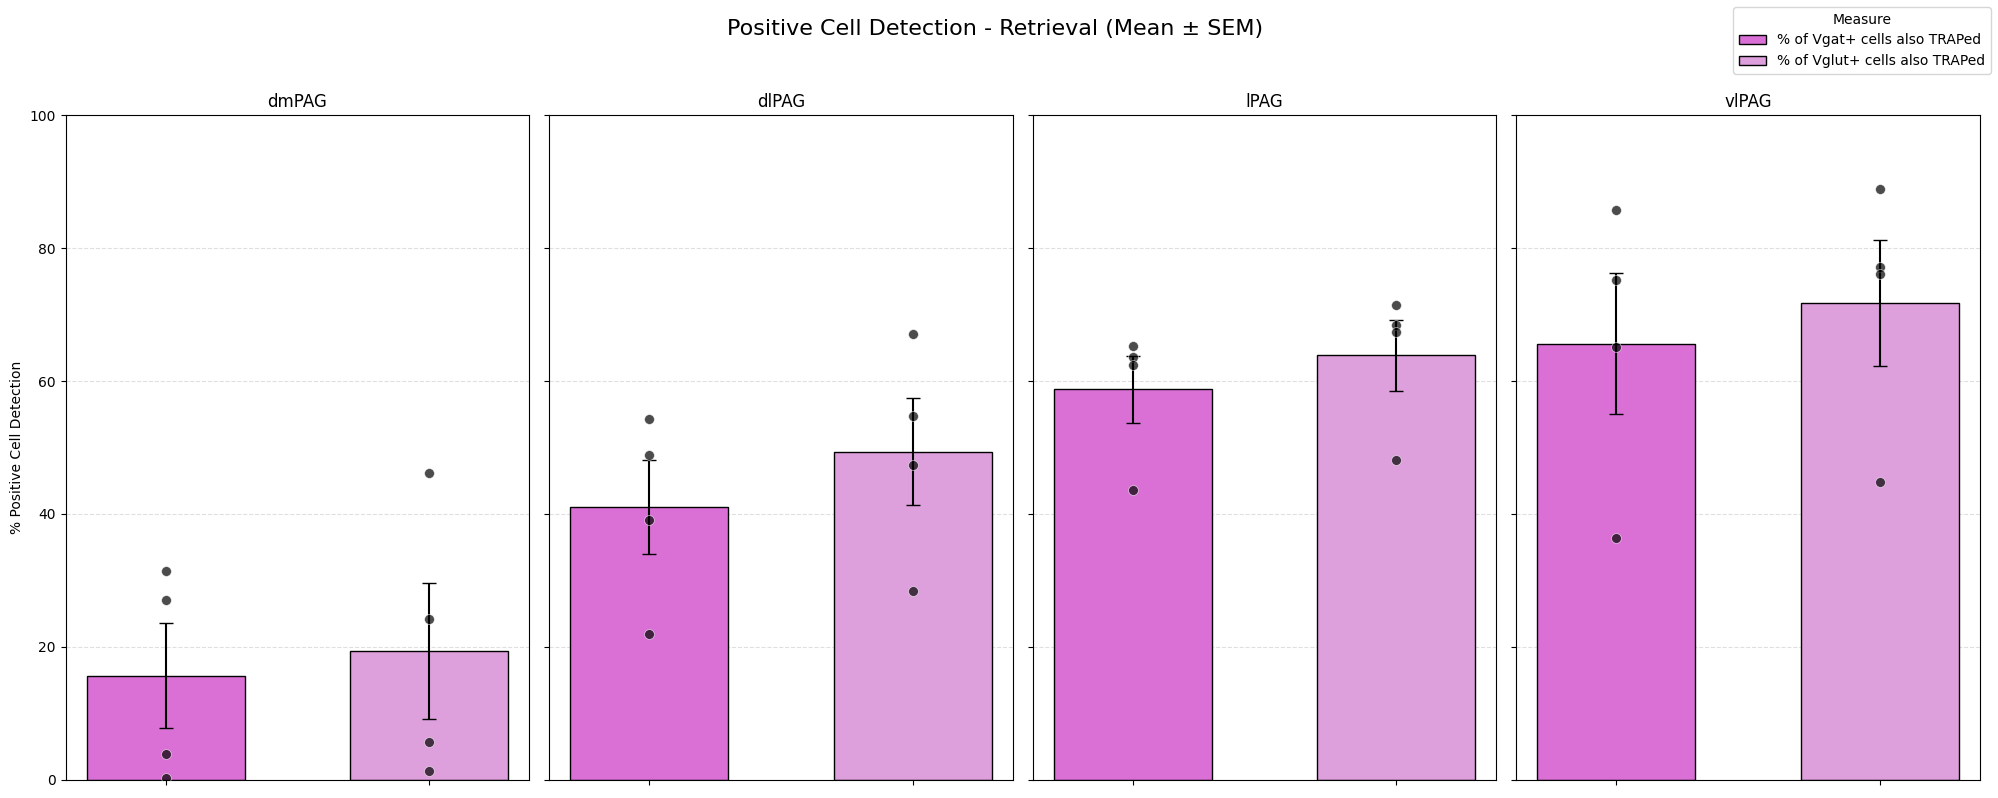

In [28]:
# Set up plot style
palette = {
    "% of Vgat+ cells also TRAPed": 'orchid',
    "% of Vglut+ cells also TRAPed": 'plum'
}
measures = ["% of Vgat+ cells also TRAPed", "% of Vglut+ cells also TRAPed"]

# Create 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 8), sharey=True)

for i, region in enumerate(region_order):
    ax = axes[i]

    # Filter data
    stats_sub = group_stats_vgat_vglut[group_stats_vgat_vglut['Region'] == region]
    data_sub = long_df_vgat_vglut[long_df_vgat_vglut['Region'] == region]
#     display(stats_sub)
#     display(data_sub)

    # Create slight x-offset for spacing between bars
    x_positions = np.array([0, 1])  # two bars per plot
    bar_width = 0.6

    for j, measure in enumerate(measures):
        mean = stats_sub.loc[stats_sub['Measure'] == measure, 'Mean'].values[0]
        sem = stats_sub.loc[stats_sub['Measure'] == measure, 'SEM'].values[0]
        color = palette[measure]
        xpos = x_positions[j]

        # Draw bar with black edge
        bar = ax.bar(
            xpos,
            mean,
            yerr=sem,
            width=bar_width,
            color=color,
            edgecolor='black',
            capsize=5,
            label=measure if i == 0 else "",  # avoid duplicate legends
            zorder=2
        )

        # Overlay individual dots (brains)
        brain_vals = data_sub[data_sub['Measure'] == measure]['Percent']
        ax.scatter(
            np.full(len(brain_vals), xpos),
            brain_vals,
            color='black',
            s=50,
            zorder=3,
            alpha=0.7,
            edgecolor='white',
            linewidth=0.5
        )

    # Format each subplot
    ax.set_xticks(x_positions)
    ax.set_xticklabels([]) # ax.set_xticklabels(measures, rotation=45)
    ax.set_title(region)
    ax.set_ylim(0, 100)
    ax.grid(axis='y', linestyle='--', alpha=0.4, zorder=0)

# Y label on first subplot
axes[0].set_ylabel('% Positive Cell Detection')

# Shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title='Measure')

plt.suptitle('Positive Cell Detection - Retrieval (Mean ± SEM)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
fig_filepath = Path(f"{fig_output_dir}/vgat_vglut_alsoTRAP.png")  
fig_filepath.parent.mkdir(parents=True, exist_ok=True)  
plt.savefig(fig_filepath)
plt.show()

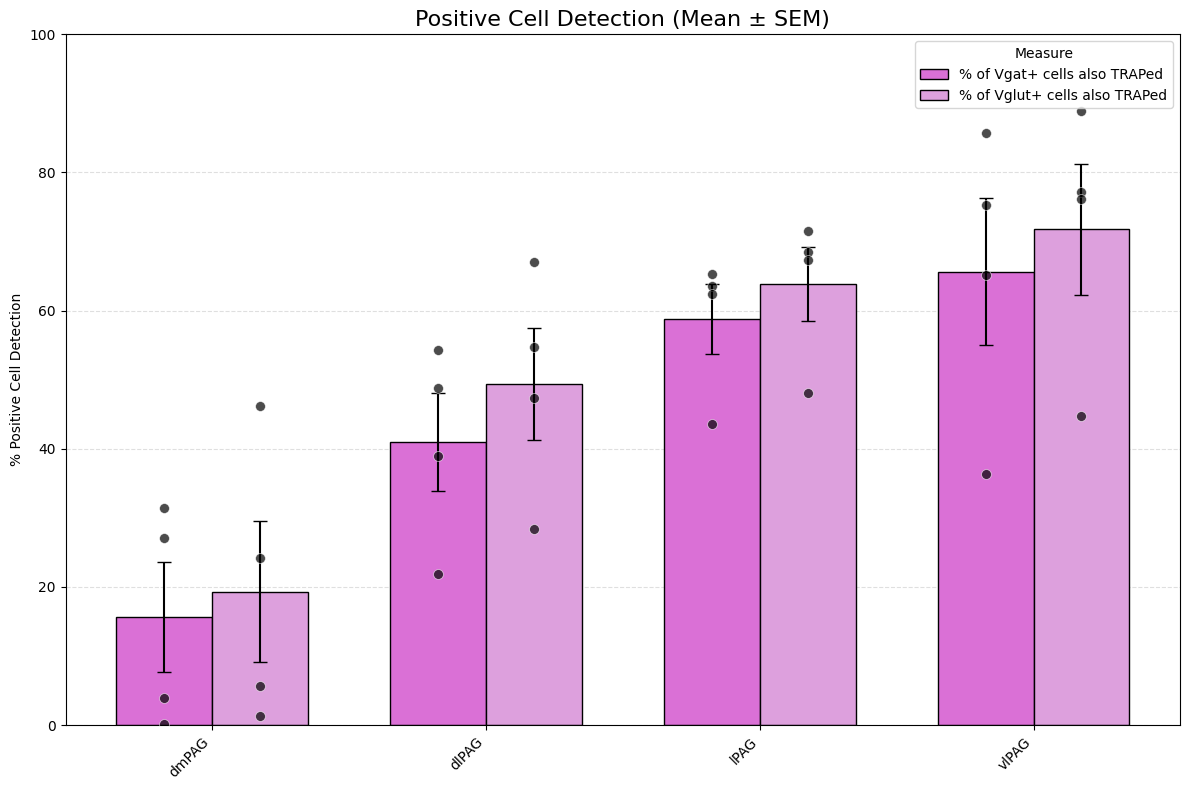

In [29]:
# Create one big plot
fig, ax = plt.subplots(figsize=(12, 8))

# Setup
num_regions = len(region_order)
bar_width = 0.35
x_spacing = 1  # space between region groups
x_offsets = [-bar_width/2, bar_width/2]  # offsets for the two measures

# Create positions for each region group
region_positions = np.arange(num_regions) * x_spacing

for i, region in enumerate(region_order):
    # Filter data for region
    stats_sub = group_stats_vgat_vglut[group_stats_vgat_vglut['Region'] == region]
    data_sub = long_df_vgat_vglut[long_df_vgat_vglut['Region'] == region]

    for j, measure in enumerate(measures):
        mean = stats_sub.loc[stats_sub['Measure'] == measure, 'Mean'].values[0]
        sem = stats_sub.loc[stats_sub['Measure'] == measure, 'SEM'].values[0]
        color = palette[measure]
        xpos = region_positions[i] + x_offsets[j]

        # Bar with error
        ax.bar(
            xpos,
            mean,
            yerr=sem,
            width=bar_width,
            color=color,
            edgecolor='black',
            capsize=5,
            label=measure if i == 0 else "",  # only add to legend once
            zorder=2
        )

        # Overlay brain-level dots
        brain_vals = data_sub[data_sub['Measure'] == measure]['Percent']
        ax.scatter(
            np.full(len(brain_vals), xpos),
            brain_vals,
            color='black',
            s=50,
            zorder=3,
            alpha=0.7,
            edgecolor='white',
            linewidth=0.5
        )

# Formatting
ax.set_xticks(region_positions)
ax.set_xticklabels(region_order, rotation=45, ha='right')
ax.set_ylabel('% Positive Cell Detection')
ax.set_ylim(0, 100)
ax.grid(axis='y', linestyle='--', alpha=0.4, zorder=0)

# Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Measure', loc='upper right')

# Title and save
plt.title('Positive Cell Detection (Mean ± SEM)', fontsize=16)
plt.tight_layout()
# fig_filepath = Path(f"{fig_output_dir}/vgat_vglut_groupedbar.png")
# fig_filepath.parent.mkdir(parents=True, exist_ok=True)
# plt.savefig(fig_filepath)
plt.show()
